<a href="https://colab.research.google.com/github/leinaxd/NOTES/blob/main/digital_image_processing/notebooks/11b_polygon_fitting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

source

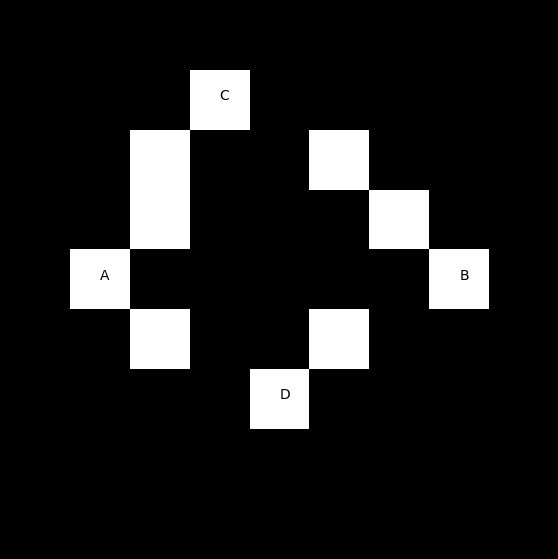

In [122]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('dark_background')

img = np.array(
    [[0,0,0,0,0,0,0,0,0],
     [0,0,0,1,0,0,0,0,0],
     [0,0,1,0,0,1,0,0,0],
     [0,0,1,0,0,0,1,0,0],
     [0,1,0,0,0,0,0,1,0],
     [0,0,1,0,0,1,0,0,0],
     [0,0,0,0,1,0,0,0,0],
     [0,0,0,0,0,0,0,0,0],
     [0,0,0,0,0,0,0,0,0]])
plt.figure(figsize=(7,7))
plt.imshow(img, cmap='gray')
plt.text(1,4,'A',color='k')
plt.text(7,4,'B',color='k')
plt.text(3,1,'C',color='k')
plt.text(4,6,'D',color='k')
plt.axis('off');

Polygon fitting

(1, 3)
(2, 2)
removing: (2, 2)
removing: (1, 3)
(3, 2)
removing: (4, 1)
(2, 5)
(6, 4)
(2, 5)
(3, 2)
(5, 2)
(3, 2)
removing: (3, 2)
(4, 1)
removing: (4, 1)
removing: (5, 2)
removing: (2, 5)
(3, 6)
removing: (3, 6)
(5, 5)
removing: (6, 4)
(5, 5)
removing: (4, 7)


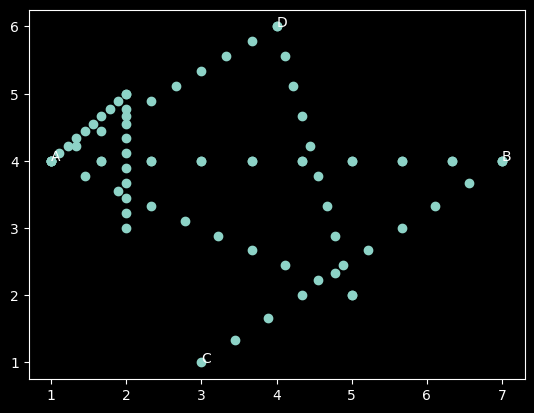

In [126]:
def polygon_fitting(img, A, B, T, closed=True):
    """A: starting point, B Ending point, T:threshold
    Note: If the curve is open, A,B are the natural endpoints
          if the curve is closed, A,B are the leftmost & rightmost points
    """
    P = []
    for r in range(img.shape[0]):
        for c in range(img.shape[1]):
            if img[r,c]==1: P.append((r,c))

    final = [B]
    if closed:
        in_process = [B,A] #note if closed
    else: in_process = [A]

    nLineSteps = 10
    lines = []
    
    while len(in_process) !=0:
        A = final[-1]
        B = in_process[-1]
        line = np.linspace(A,B, nLineSteps)
        lines.append(line)

        max_dist = 0
        next_point = None
        center = (0.5*(B[0]-A[0]), 0.5*(B[1]-A[1]))
        rad = (0.5*(B[0]+A[0]), 0.5*(B[1]+A[1]))
        for i, p in enumerate(P):
            #Is the point between A and B?
            if abs(p[0]-center[0])+abs(p[1]-center[1]) > abs(rad[0]+rad[1]): continue
            
            min_dist = float('inf') #min dist line to point (projection)
            for l in line: #it has to be done with linear algebra
                new_dist = abs(p[0]-l[0]) + abs(p[1]-l[1]) #norm_1 against points in the line
                if new_dist < min_dist: min_dist = new_dist
            if min_dist > max_dist:
                max_dist = min_dist
                next_point = i
                print(p)
        if max_dist >= T: 
            in_process.append(P.pop(next_point))
        else:
            p = in_process.pop()
            final.append(p)
            print('removing:', p)
            lines.pop()
        # print(max_dist, in_process[-1])

    return np.array(lines)

lines = polygon_fitting(img, A=(4,1), B=(4,7), T=0.5)

plt.scatter(lines.T[1], lines.T[0])
plt.text(1,4,'A')
plt.text(7,4,'B')
plt.text(3,1,'C')
plt.text(4,6,'D');

CHATGPT

Text(4, 6, 'D')

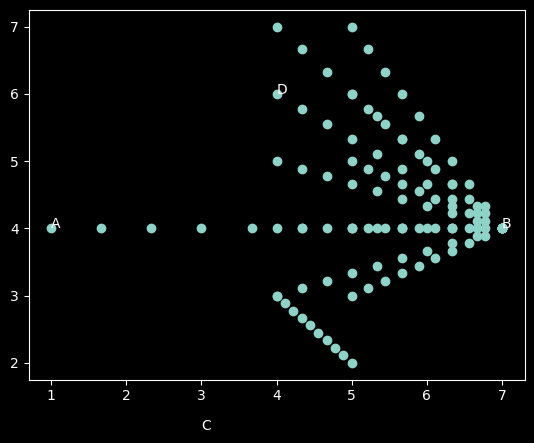

In [125]:
import numpy as np
import matplotlib.pyplot as plt

def polygon_fitting(img, A, B, T, closed=True):
    """A: starting point, B: ending point, T: threshold
    Note: If the curve is open, A, B are the natural endpoints
          if the curve is closed, A, B are the leftmost & rightmost points
    """
    P = []
    for r in range(img.shape[0]):
        for c in range(img.shape[1]):
            if img[r, c] == 1:
                P.append((r, c))

    final = [B]
    if closed:
        in_process = [B, A]  # note if closed
    else:
        in_process = [A]

    nLineSteps = 10
    lines = []
    
    while len(in_process) != 0:
        A = final[-1]
        B = in_process[-1]
        line = np.linspace(A, B, nLineSteps)
        lines.append(line)

        max_dist = 0
        next_point = None
        for p in P:
            # Is the point between A and B?
            p = np.array(p)
            A = np.array(A)
            B = np.array(B)
            projection = np.dot(p - A, B - A) / np.linalg.norm(B - A) ** 2
            if projection < 0 or projection > 1:
                continue
            min_dist = np.linalg.norm(p - projection * (B - A))
            if min_dist > max_dist:
                max_dist = min_dist
                next_point = p

        if max_dist >= T:
            in_process.append(next_point)
            P = [point for point in P if not np.array_equal(point, next_point)]
        else:
            p = in_process.pop()
            final.append(p)
            lines.pop()

    return np.array(lines)

# Example usage
img_2 = np.zeros((10, 10))
img_2[2:8, 4:6] = 1
lines = polygon_fitting(img_2, A=(4,1), B=(4,7), T=0.5)

plt.scatter(lines.T[1], lines.T[0])
plt.text(1, 4, 'A')
plt.text(7, 4, 'B')
plt.text(3, 1, 'C')
plt.text(4, 6, 'D');